In [11]:
!pip3 uninstall -y mltoolhub
!pip3 install mltoolhub==0.0.5

Found existing installation: mltoolhub 0.0.5
Uninstalling mltoolhub-0.0.5:
  Successfully uninstalled mltoolhub-0.0.5
  Using cached mltoolhub-0.0.5-py3-none-any.whl.metadata (630 bytes)
Using cached mltoolhub-0.0.5-py3-none-any.whl (5.7 kB)


In [12]:
import os
import numpy as np
import pandas as pd
import mltoolhub as mlt
import matplotlib.pyplot as plt

In [13]:
mlt.__version__

'0.0.5'

In [14]:
dataset_dir = "./"

train_data = pd.read_csv(os.path.join(dataset_dir,'train.csv'))
test_data = pd.read_csv(os.path.join(dataset_dir,'test.csv'))

print('[+] Dataset Loaded :\n\n Train data size : %s \n Test data size : %s'%(train_data.shape,test_data.shape))

target = "Transported"
train_target_val = train_data[target].astype(np.uint8)
train_data = train_data.drop(target,axis=1)

train_data.head(10)

[+] Dataset Loaded :

 Train data size : (8693, 14) 
 Test data size : (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic


In [15]:
# lets drop ids and name from data

features_to_drop = ['PassengerId','Name']

train_data = train_data.drop(features_to_drop,axis=1)

test_data_idxs = test_data['PassengerId'].to_list()
test_data = test_data.drop(features_to_drop,axis=1)

print('[+] %s are dropped from train and test data !'%features_to_drop)

[+] ['PassengerId', 'Name'] are dropped from train and test data !


In [16]:
# cabin have some information embedded 
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

train_data[['Deck','Num','Side']] = train_data['Cabin'].str.split('/',expand=True)
train_data = train_data.drop('Cabin',axis=1)

test_data[['Deck','Num','Side']] = test_data['Cabin'].str.split('/',expand=True)
test_data = test_data.drop('Cabin',axis=1)

print('[+] Cabin feature is splitted into Deck/Num/Side.')


[+] Cabin feature is splitted into Deck/Num/Side.


In [17]:
train_data['Num'] = pd.to_numeric(train_data['Num'],errors="coerce")
test_data['Num'] = pd.to_numeric(train_data['Num'],errors="coerce")

print("[+] Changed Num to numeric.")

[+] Changed Num to numeric.


In [18]:
train_data_summary = mlt.get_quick_summary(train_data,classify=True)
train_data_summary

,features,dtypes,missing_count,missing_percentage,nature,skewness,skew_type,kurtosis,kurt_type,no_of_classes
0,HomePlanet,object,201,2.312205,category,NaN,NaN,NaN,NaN,3.0
1,CryoSleep,object,217,2.496261,category,NaN,NaN,NaN,NaN,2.0
2,Destination,object,182,2.093639,category,NaN,NaN,NaN,NaN,3.0
3,Age,float64,179,2.059128,numeric,0.419097,right-skewed,0.101933,platy,NaN
4,VIP,object,203,2.335212,category,NaN,NaN,NaN,NaN,2.0
5,RoomService,float64,181,2.082135,numeric,6.333014,right-skewed,65.273802,lepto,NaN
6,FoodCourt,float64,183,2.105142,numeric,7.102228,right-skewed,73.307230,lepto,NaN
7,ShoppingMall,float64,208,2.392730,numeric,12.627562,right-skewed,328.870913,lepto,NaN
8,Spa,float64,183,2.105142,numeric,7.636020,right-skewed,81.202110,lepto,NaN
9,VRDeck,float64,188,2.162660,numeric,7.819732,right-skewed,86.011186,lepto,NaN


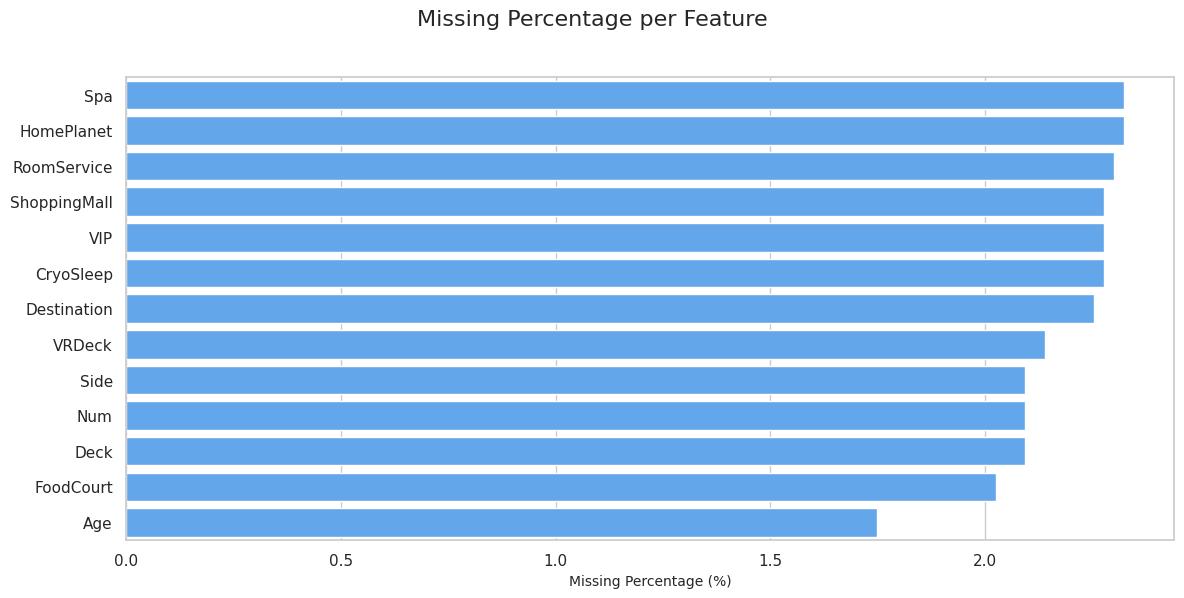

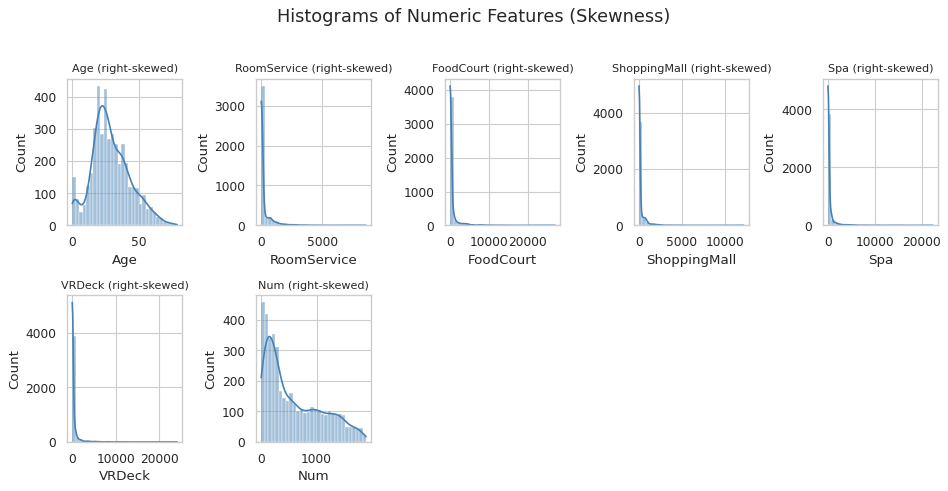

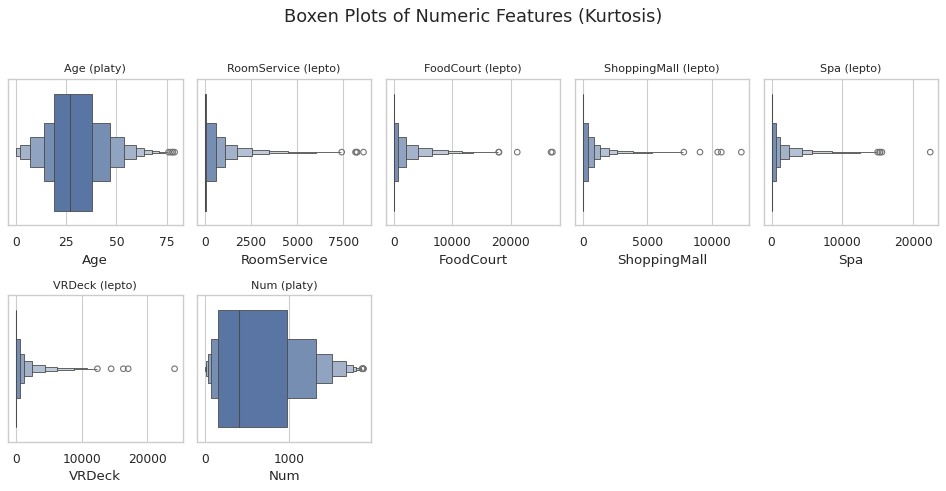

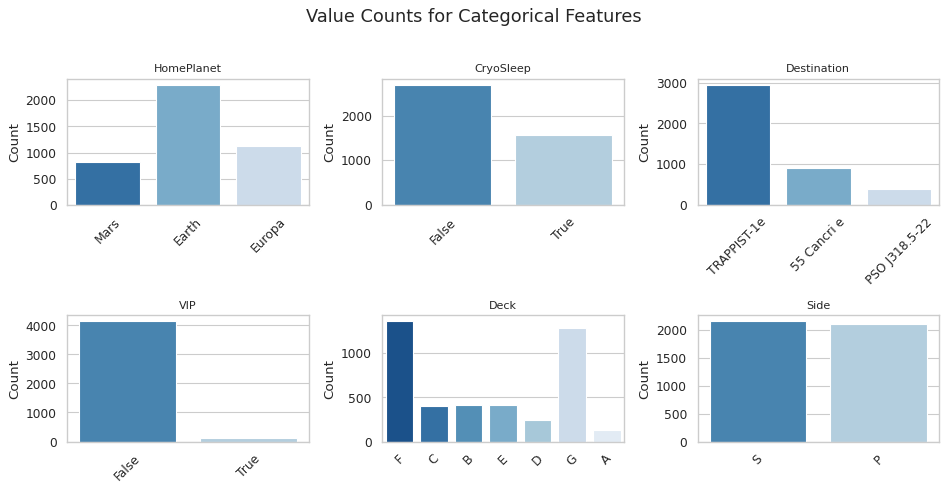

In [19]:
mlt.get_summary_plots(train_data)

In [20]:
# now lets handle missing values
# will go simple now, skewed dist : median , category : mode
# TODO : ignoring class imbalance for now

 
skewed_num_feats = train_data_summary.loc[(train_data_summary['skew_type']!='normal') & (train_data_summary['nature']=='numeric'),"features"].to_list()
normal_num_feats = train_data_summary.loc[(train_data_summary['skew_type']=='normal') & (train_data_summary['nature']=='numeric'),"features"].to_list()

print('Skewed dist features : %s\nNormal dist features : %s'%(skewed_num_feats,normal_num_feats))

skew_feats_median = train_data[skewed_num_feats].median()
train_data[skewed_num_feats] = train_data[skewed_num_feats].fillna(skew_feats_median)
test_data[skewed_num_feats] = test_data[skewed_num_feats].fillna(skew_feats_median)

categorical_features = train_data_summary.loc[(train_data_summary['nature']=='category'),'features'].to_list()

cat_feats_mode = train_data[categorical_features].mode().iloc[0]
train_data[categorical_features] = train_data[categorical_features].fillna(cat_feats_mode)
test_data[categorical_features] = test_data[categorical_features].fillna(cat_feats_mode)



Skewed dist features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']
Normal dist features : []


In [21]:
# seems all categories doesn't have any order, so we can simply one-hot

categorical_features = train_data_summary.loc[(train_data_summary['nature']=='category'),'features'].to_list()

train_data = pd.get_dummies(train_data,columns=categorical_features,dtype=np.uint8)
test_data = pd.get_dummies(test_data,columns=categorical_features,dtype=np.uint8)



train_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,98.0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1499.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1500.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,608.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [22]:
# reupdates train_data_summary

train_data_summary= mlt.get_quick_summary(train_data)
train_data_summary

,features,dtypes,missing_count,missing_percentage,nature,skewness,kurtosis,no_of_classes
0,Age,float64,0,0.0,numeric,0.431102,0.169570,NaN
1,RoomService,float64,0,0.0,numeric,6.397766,66.577452,NaN
2,FoodCourt,float64,0,0.0,numeric,7.177515,74.856189,NaN
3,ShoppingMall,float64,0,0.0,numeric,12.763842,336.017352,NaN
4,Spa,float64,0,0.0,numeric,7.716450,82.920686,NaN
5,VRDeck,float64,0,0.0,numeric,7.904554,87.883437,NaN
6,Num,float64,0,0.0,numeric,0.746458,-0.648076,NaN
7,HomePlanet_Earth,uint8,0,0.0,category,NaN,NaN,2.0
8,HomePlanet_Europa,uint8,0,0.0,category,NaN,NaN,2.0
9,HomePlanet_Mars,uint8,0,0.0,category,NaN,NaN,2.0


In [23]:
# as skew > 1 and kurt > 3, it says the data has long tail outliers
# lets try log transformation

long_tail_feats = train_data_summary.loc[(train_data_summary['skewness']>1) & (train_data_summary['kurtosis']>5),'features'].to_list()

train_data[long_tail_feats] = np.log1p(train_data[long_tail_feats])
test_data[long_tail_feats] = np.log1p(test_data[long_tail_feats])

In [24]:
# now see it is balanced

mlt.get_quick_summary(train_data)

,features,dtypes,missing_count,missing_percentage,nature,skewness,kurtosis,no_of_classes
0,Age,float64,0,0.0,numeric,0.431102,0.169570,NaN
1,RoomService,float64,0,0.0,numeric,1.149866,-0.371113,NaN
2,FoodCourt,float64,0,0.0,numeric,1.143177,-0.319247,NaN
3,ShoppingMall,float64,0,0.0,numeric,1.238498,-0.106151,NaN
4,Spa,float64,0,0.0,numeric,1.122324,-0.326939,NaN
5,VRDeck,float64,0,0.0,numeric,1.193417,-0.168309,NaN
6,Num,float64,0,0.0,numeric,0.746458,-0.648076,NaN
7,HomePlanet_Earth,uint8,0,0.0,category,NaN,NaN,2.0
8,HomePlanet_Europa,uint8,0,0.0,category,NaN,NaN,2.0
9,HomePlanet_Mars,uint8,0,0.0,category,NaN,NaN,2.0


In [25]:
## Modelling and Submission

In [26]:
from sklearn.model_selection import train_test_split

X = train_data
Y = train_target_val

X_train, X_val , Y_train, Y_val  = train_test_split(X, Y, test_size=0.2)

X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((6954, 27), (6954,), (1739, 27), (1739,))

In [27]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression


lr_classifier = LogisticRegression(max_iter=1000,penalty="l2")
lr_classifier.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
from sklearn.metrics import classification_report

Y_pred = lr_classifier.predict(X_val)

print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       875
           1       0.76      0.79      0.78       864

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [29]:
# Let's try submitting


y_test_pred  = lr_classifier.predict(test_data)

sub_df = pd.DataFrame({"PassengerId":test_data_idxs,target:y_test_pred.astype(bool)})
sub_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [30]:
sub_df.to_csv('submission.csv',index=False)

In [31]:
# Achieved a public score of 0.780, ranking 2036 on Kaggle.
# This is definitely not the end — I will gradually push my way up to the top 10. 
# There is still much to explore with this dataset using MLToolHub.